## **Preprocessing:**

To using model better, this time we only keep elements `Reference, Outcomes, Count`

### **Split Training, Validation and Testing dataset:**

- **DEEPBE by Song(2020)**: What they give are `Training` and `Testing` Dataset. We use `Training` dataset as `Training + Validation`.
- **BE-DICT by Marquart(2021)**: What they give are `Training` and `Testing/Validation` Dataset. We use `Training` dataset as `Training + Validation`, and `Testing/Validation` dataset as `Testing`.
- **bedeepon by zcd(2024)**: What they give are `Training` and `Testing` Dataset and the ratio is 9:1. We use `Training` dataset as `Training + Validation`.

****

marquart ABE test shape is (5510, 7), all is (27675, 7), training is (22165, 7), and sum is 27675\
marquart CBE test shape is (6176, 7), all is (33292, 7), training is (27116, 7), and sum is 33292

zcd ABE test shape is (16441, 3), total shape is (164129, 3)\
zcd CBE test shape is (30657, 3), total shape is (304866, 3)

song ABE training dataset is (34116, 3), testing dataset is (2207, 13)\
song CBE training dataset is (37057, 3), testing dataset is (2817, 13)

arbab ABE testing dataset is (9008, 8) with types of (1265, 8), all dataset is (59947, 7)\
arbab CBE testing dataset is (8895, 8) with types of (1358, 8), all dataset is (59895, 7).
the ratio training : testing is 15.458087902129588 : 1 and 13.1547745828896 : 1

## BE-HIVE arbab 2020

The processed dataset from BE-DICT, and it has `1265 rows × 8 columns`

In [82]:
arbab_mutated_ABE = pd.read_csv(file_path, index_col = 0)
arbab_mutated_CBE = pd.read_csv(file_path, index_col = 0)

arbab_mutated_ABE['Reference'] = arbab_mutated_ABE['Reference'].str[20:40]
arbab_mutated_ABE['Outcomes'] = arbab_mutated_ABE['Outcomes'].str[20:40]
arbab_mutated_CBE['Reference'] = arbab_mutated_CBE['Reference'].str[20:40]
arbab_mutated_CBE['Outcomes'] = arbab_mutated_CBE['Outcomes'].str[20:40]

arbab_mutated_ABE = arbab_mutated_ABE.rename(columns = {'Input':'Reference', 'Output': 'Outcomes'})
arbab_mutated_CBE = arbab_mutated_CBE.rename(columns = {'Input':'Reference', 'Output': 'Outcomes'})

# ### !!!drop out sequences in arbab_mutated_ABE that it has the same ID as arbab_ABE_test_'s ID ###

arbab_ABE_test_IDs = arbab_ABE_test['ID'].unique()
arbab_mutated_ABE_ = arbab_mutated_ABE[~arbab_mutated_ABE['ID'].isin(arbab_ABE_test_IDs)]
arbab_CBE_test_IDs = arbab_CBE_test['ID'].unique()
arbab_mutated_CBE_ = arbab_mutated_CBE[~arbab_mutated_CBE['ID'].isin(arbab_CBE_test_IDs)]

print(f'before concate, mutated ABE shape is{arbab_mutated_ABE.shape}, and test shape is {arbab_ABE_test.shape}; after concate ABE shape is {arbab_mutated_ABE_.shape}')
print(f'before concate, mutated CBE shape is{arbab_mutated_CBE.shape}, and test shape is {arbab_CBE_test.shape}; after concate ABE shape is {arbab_mutated_CBE_.shape}')

before concate, mutated ABE shape is(59947, 3), and test shape is (9008, 8); after concate ABE shape is (52615, 3)
before concate, mutated CBE shape is(59895, 3), and test shape is (8895, 8); after concate ABE shape is (50073, 3)


In [88]:
arbab_ABE_train_ = pd.merge(arbab_mutated_ABE_, arbab_ABE_all, how = 'left', on = ['ID','Reference','Outcomes'])
arbab_CBE_train_ = pd.merge(arbab_mutated_CBE_, arbab_ABE_all, how = 'left', on = ['ID','Reference','Outcomes'])
arbab_ABE_train_ = arbab_ABE_train_.fillna(0)
arbab_CBE_train_ = arbab_CBE_train_.fillna(0)

print(f'after process, ABE training dataset is {arbab_ABE_train_.shape}, all {arbab_ABE_all.shape}, CBE has {arbab_CBE_train_.shape}, all {arbab_CBE_all.shape}')

after process, ABE training dataset is (52615, 6), all (59947, 6), CBE has (50073, 6), all (59895, 6)


## DEEPBE song 2020

In [141]:
song_ABE_train = pd.read_csv(file_path,header = None)
song_ABE_test = pd.read_csv(file_path,header = None)
song_CBE_train = pd.read_csv(file_path,header = None)
song_CBE_test = pd.read_csv(file_path,header = None)

print(f'song ABE training dataset is {song_ABE_train.shape}, testing dataset is {song_ABE_test.shape}\nsong CBE training dataset is {song_CBE_train.shape}, testing dataset is {song_CBE_test.shape},\nthe ratio training : testing is {len(song_ABE_train)/len(song_ABE_test)} : 1 and {len(song_CBE_train)/len(song_CBE_test)} : 1')

song ABE training dataset is (34116, 3), testing dataset is (2207, 13)
song CBE training dataset is (37057, 3), testing dataset is (2817, 13),
the ratio training : testing is 15.458087902129588 : 1 and 13.1547745828896 : 1


## BE-DICT marqurat 2021

In [161]:
marquart_ABE_all = pd.read_csv(file_path)
marquart_CBE_all = pd.read_csv(file_path)

marquart_ABE_all['Count'] = marquart_ABE_all['Counts'] * marquart_ABE_all['Proportion']
marquart_CBE_all['Count'] = marquart_CBE_all['Counts'] * marquart_CBE_all['Proportion']
marquart_ABE_train = marquart_ABE_all[marquart_ABE_all['Purpose'] == 'Training']
marquart_CBE_train = marquart_CBE_all[marquart_CBE_all['Purpose'] == 'Training']

print(f'marquart ABE test shape is {marquart_ABE_test.shape}, all is {marquart_ABE_all.shape}, training is {marquart_ABE_train.shape}, and sum is {len(marquart_ABE_test) + len(marquart_ABE_train)}\nmarquart CBE test shape is {marquart_CBE_test.shape}, all is {marquart_CBE_all.shape}, training is {marquart_CBE_train.shape}, and sum is {len(marquart_CBE_test) + len(marquart_CBE_train)}\nthe ratio training : testing is {len(marquart_ABE_train)/len(marquart_ABE_test)} : 1 and {len(marquart_CBE_train)/len(marquart_CBE_test)} : 1')

print('Check if their testing dataset contains validation dataset: ...')

marquart_ABE_own_test_dataset = pd.read_csv(file_path)
marquart_CBE_own_test_dataset = pd.read_csv(file_path)

print(f'marquart:\nWe can split {marquart_ABE_test.shape} datas of all, and in their testing stage, they use {marquart_ABE_own_test_dataset.shape} datas.\nWe can split {marquart_CBE_test.shape} datas of all, and in their testing stage, they use {marquart_CBE_own_test_dataset.shape} datas.')

marquart ABE test shape is (5510, 7), all is (27675, 7), training is (22165, 7), and sum is 27675
marquart CBE test shape is (6176, 7), all is (33292, 7), training is (27116, 7), and sum is 33292
the ratio training : testing is 4.0226860254083485 : 1 and 4.390544041450777 : 1
Check if their testing dataset contains validation dataset: ...
marquart:
We can split (5510, 7) datas of all, and in their testing stage, they use (5510, 8) datas.
We can split (6176, 7) datas of all, and in their testing stage, they use (6176, 8) datas.


## **HIVE dataset notes:**

seq is a **50-nt** string of DNA characters, spanning from positions **-19 to 30** where positions **1-20 are the spacer**, an NGG PAM occurs at positions 21-23, and position 0 is used to refer to the position directly upstream of position 1.

### **Step1: Why there are only 10486 seqs?**

**Note:**

Quoted from *Base Editing Efficiency Model*:

> We observed that base editing efficiency varies by experimental batch. To combine replicates across batches, we first performed mean centering and logit transformation at up to 10,638 gRNA-target pairs in each experimental condition separately from the 12kChar library which includes all 4-mers surrounding A or C from protospacer positions 1 to 11. We discarded data at target sites with fewer than 100 total reads, then averaged values at matched target sites across experimental replicates. Values of negative or positive infinity (resulting from logit of 0 or 1) were discarded.

Quoted from *Bystander Editing Model*:

> We assembled a dataset where each gRNA-target pair was matched with a table of observed base editing genotypes and their frequencies among reads with edited outcomes. We discarded data points with fewer than 100 edited reads. We discarded edited genotypes occurring at higher than 2.5% frequency with no edits at any substrate nucleotides (defined as C for CBEs and A for ABEs) in positions 1–10.


In [82]:
#### !!! ATTENTION: be sure your index dimension(no hierachical index)

arbab_ABE_10638_seq = arbab_ABE_10638_seq[['Name (unique)', 'Sequence context (56nt)']]
# arbab_ABE_10638_seq = arbab_ABE_10638_seq.rename(columns = {'Name (unique)':'ID', 'Sequence context (56nt)':'Input'})
arbab_ABE_10638_seq = arbab_ABE_10638_seq.rename(columns = {'Name (unique)':'ID', 'Sequence context (56nt)':'Reference'})
arbab_ABE_10638_seq = arbab_ABE_10638_seq.drop_duplicates(subset = 'ID')

print(arbab_ABE_10638_seq.columns)
# arbab_ABE_10638_seq['Input'] = arbab_ABE_10638_seq['Input'].astype(str)
arbab_ABE_10638_seq['Reference'] = arbab_ABE_10638_seq['Reference'].astype(str)

# print(arbab_ABE_10638_seq.dtypes)
# print(len(arbab_ABE_10638_seq['Input'][0]))
# print(arbab_ABE_10638_seq.shape)
# print(arbab_ABE_10638_seq.columns)
# print(arbab_ABE_10638_seq.dtypes)

arbab dataset from arbab_HEK293T_12kChar_ABE.csv: (10468, 24)
Index(['Unnamed: 0.1', 'Name (unique)', 'gRNA (20nt)',
       'Sequence context (56nt)', 'Protospacer position zero index',
       'Genomic context', 'Genomic context build', 'Design category',
       'CBE aberrant count', 'Fraction CBE aberrant edit',
       'Fraction edited 190103_HEK293T_12kChar_ABE',
       'Total count 190103_HEK293T_12kChar_ABE',
       'Edited count 190103_HEK293T_12kChar_ABE',
       'Fraction edited logit 190103_HEK293T_12kChar_ABE',
       'Fraction edited logit norm 190103_HEK293T_12kChar_ABE',
       'Fraction edited 190419_HEK293T_12kChar_ABE',
       'Total count 190419_HEK293T_12kChar_ABE',
       'Edited count 190419_HEK293T_12kChar_ABE',
       'Fraction edited logit 190419_HEK293T_12kChar_ABE',
       'Fraction edited logit norm 190419_HEK293T_12kChar_ABE',
       'logit norm variance', 'logit norm mean', 'Y', 'Y_weight'],
      dtype='object')
Index(['ID', 'Reference'], dtype='object')


### **Step2: Generate Mutations**

The `Input` library is from `arbab_HEK293T_12kChar_ABE.csv` file, be attention to your file input! not the recovered one with `6633` rows. That will make it fails due to its `Input` presents the certain `Outcomes` instead of `Reference`.

So far, we have dropped its duplicates and get `10191` rows of library sequences, then we import `apply_mutations` function to generate mutations of all.


In [42]:
be_hive_ABE_mutations = apply_mutations(arbab_ABE_10638_seq, 'A', 22, 30)

Sequence: TAGCCAGGATGGTCTCAATAACGTACGTGTCCTGGCTGCCCGGCTTGGCC, Length: 50, Positions: range(22, 30)
Sequence: CTGCTGCGTAGTATTCCTGTCATATCTACGCGTCGCACTTGGGTATCCAT, Length: 50, Positions: range(22, 30)
Sequence: CAGGGTCTCTTCCGTCTGGCGCAATAAGTTCGAACGCTGAAGGGTCTCAA, Length: 50, Positions: range(22, 30)
Sequence: CATAGCCAGGCACTGGCCCGTATATCATGCGCTGCGGTGGCGGGGTGACC, Length: 50, Positions: range(22, 30)
Sequence: TGTGTAACTGGGCAGAGCGTGTCTAATAGCCGGCAAAGATCGGGCATTCT, Length: 50, Positions: range(22, 30)
Sequence: CCGGCCCAAATTTGTTCTAGATTGCATAGGTGGAGGGGAGCGGTTGGGAG, Length: 50, Positions: range(22, 30)
Sequence: CAAAGTGGAACTTCCACTCGCAGGCCACGGCCGCGAGGCTCGGAGGGTAC, Length: 50, Positions: range(22, 30)
Sequence: CGTTCTTATTCCCAGACTTCATGATCGGGAGCCGACCTAGCGGATACAGA, Length: 50, Positions: range(22, 30)
Sequence: TCCCTTTCATTTGTTCGGGCTCCAAAGGGCAGACTCTTGCTGGGTGCTAA, Length: 50, Positions: range(22, 30)
Sequence: CTCTGTCGCCCAGGCTGGAGCGAGCAAATAAACGCATGGATGGTTGCATC, Length: 50, Positions: range(22, 30)
Sequence: 

In [43]:
be_hive_ABE_mutations.shape

(59947, 3)

In [44]:
base_name = 'ABE'

be_hive_ABE_mutations = be_hive_ABE_mutations.rename(columns = {'Input': 'Reference', 'Output':'Outcomes'})
be_hive_ABE_mutations.to_csv(file_path)

### **Step3: Read and Process Pickle Files**

In this step, we will 'recover' the split alphabet into one continues sequence whose length is equal to 50bp. The pickle file only has its key(names) and split base groups like the following figure:

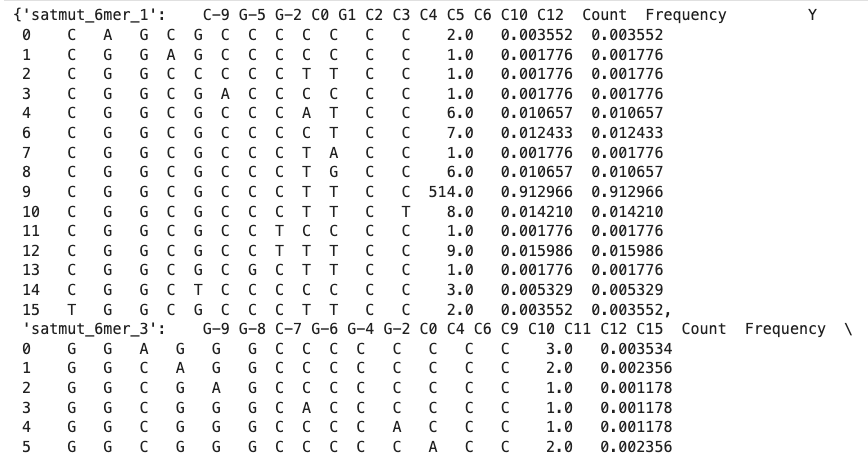

Hence, we can get its `Outcomes` first. Then, according to its key name, we append its `Reference` to the dataframe.

Then, after we get the 'recovered' pkl files which is converted to csv files with `69530` rows, we concate it with mutated dataframe in column `Outcomes`, and put all `nan` efficiency as 0. Finally, we get the real data of all(training + test)

****

**number of pkl real datas**

The total rows are `6633(seq types)` from `arbab_HEK293T_12kChar_ABE.pkl` pkl file\
And total shape of `1265 rows(seq types) × 8 columns` from testing data `BE-DICT_arbab_freq_ABE` and all of them are contained in `6633` rows.

In [83]:
with open(file_path) as f:
    file = pkl.load(f)
seq_names = list(file.keys())
print(len(seq_names))
# display(file)

result_df = process_pkl_data(file, arbab_ABE_10638_seq)
result_df_ = result_df[['ID', 'Reference', 'Count', 'Frequency', 'Y']]

result_df_.to_csv(file_path)

### !!! Ensure all of the test names are in 10638 keys(names) of csv file.

# arbab_ABE_10638_seq_names = arbab_ABE_10638_seq['ID'].astype(str).tolist()

# common_names = set(seq_names).intersection(arbab_ABE_10638_seq_names)
# missing_in_df = set(seq_names).difference(arbab_ABE_10638_seq_names)

# print(arbab_ABE_10638_seq.shape)
# print(arbab_ABE_test_.shape)
# arbab_concat = pd.merge(arbab_ABE_10638_seq, arbab_ABE_test_, on = 'ID')
# print(arbab_concat.shape)

6633
Invalid position format in column name: Count_190103_HEK293T_12kChar_ABE
Invalid position format in column name: Frequency_190103_HEK293T_12kChar_ABE
Invalid position format in column name: Count_190419_HEK293T_12kChar_ABE
Invalid position format in column name: Frequency_190419_HEK293T_12kChar_ABE
Invalid position format in column name: Count_190103_HEK293T_12kChar_ABE
Invalid position format in column name: Frequency_190103_HEK293T_12kChar_ABE
Invalid position format in column name: Count_190419_HEK293T_12kChar_ABE
Invalid position format in column name: Frequency_190419_HEK293T_12kChar_ABE
Invalid position format in column name: Count_190103_HEK293T_12kChar_ABE
Invalid position format in column name: Frequency_190103_HEK293T_12kChar_ABE
Invalid position format in column name: Count_190419_HEK293T_12kChar_ABE
Invalid position format in column name: Frequency_190419_HEK293T_12kChar_ABE
Invalid position format in column name: Count_190103_HEK293T_12kChar_ABE
Invalid position forma

In [9]:
print(be_hive_ABE_pkl.shape, be_hive_ABE_mutations.shape, len(be_hive_ABE_pkl)+len(be_hive_ABE_mutations))
print(be_hive_ABE_pkl.dtypes, be_hive_ABE_mutations.dtypes)
print(be_hive_ABE_pkl.columns, be_hive_ABE_mutations.columns)

(69530, 5) (59947, 3) 129477
ID            object
Outcomes      object
Count        float64
Frequency    float64
Y            float64
dtype: object ID           object
Reference    object
Outcomes     object
dtype: object
Index(['ID', 'Outcomes', 'Count', 'Frequency', 'Y'], dtype='object') Index(['ID', 'Reference', 'Outcomes'], dtype='object')


In [10]:
arbab_ABE_all = pd.merge(be_hive_ABE_mutations, be_hive_ABE_pkl, how = 'left', on = ['Outcomes','ID'])
arbab_ABE_all = arbab_ABE_all.fillna(0)
print(arbab_ABE_all.shape)

(59947, 6)


### **BE-HIVE CBE(BE4) process:**
- `arbab_HEK293T_12kChar_BE4.csv` has 10409 rows (without duplicated).
- `arbab_HEK293T_12kChar_BE4.pkl` (the processed one) has 7156 rows

In [77]:
arbab_CBE_10638_seq['Sequence context (56nt)'] = arbab_CBE_10638_seq['Sequence context (56nt)'].str[2:52]
print(f'arbab dataset from arbab_HEK293T_12kChar_CBE.csv: {arbab_CBE_10638_seq.shape}')
print(arbab_CBE_10638_seq.columns)

#### !!! ATTENTION: be sure your index dimension(no hierachical index)

arbab_CBE_10638_seq = arbab_CBE_10638_seq[['Name (unique)', 'Sequence context (56nt)']]
# arbab_CBE_10638_seq = arbab_CBE_10638_seq.rename(columns = {'Name (unique)':'ID', 'Sequence context (56nt)':'Input'})
arbab_CBE_10638_seq = arbab_CBE_10638_seq.rename(columns = {'Name (unique)':'ID', 'Sequence context (56nt)':'Reference'})
arbab_CBE_10638_seq = arbab_CBE_10638_seq.drop_duplicates(subset = 'ID')

print(arbab_CBE_10638_seq.columns)
# arbab_CBE_10638_seq['Input'] = arbab_CBE_10638_seq['Input'].astype(str)
arbab_CBE_10638_seq['Reference'] = arbab_CBE_10638_seq['Reference'].astype(str)
# be_hive_CBE_mutations = apply_mutations(arbab_CBE_10638_seq, 'C', 22, 30)

arbab dataset from arbab_HEK293T_12kChar_CBE.csv: (10409, 24)
Index(['Unnamed: 0.1', 'Name (unique)', 'gRNA (20nt)',
       'Sequence context (56nt)', 'Protospacer position zero index',
       'Genomic context', 'Genomic context build', 'Design category',
       'CBE aberrant count', 'Fraction CBE aberrant edit',
       'Fraction edited 190103_HEK293T_12kChar_BE4',
       'Total count 190103_HEK293T_12kChar_BE4',
       'Edited count 190103_HEK293T_12kChar_BE4',
       'Fraction edited logit 190103_HEK293T_12kChar_BE4',
       'Fraction edited logit norm 190103_HEK293T_12kChar_BE4',
       'Fraction edited 190419_HEK293T_12kChar_BE4',
       'Total count 190419_HEK293T_12kChar_BE4',
       'Edited count 190419_HEK293T_12kChar_BE4',
       'Fraction edited logit 190419_HEK293T_12kChar_BE4',
       'Fraction edited logit norm 190419_HEK293T_12kChar_BE4',
       'logit norm variance', 'logit norm mean', 'Y', 'Y_weight'],
      dtype='object')
Index(['ID', 'Reference'], dtype='object')


In [46]:
base_name = 'CBE'

be_hive_CBE_mutations = be_hive_CBE_mutations.rename(columns = {'Input': 'Reference', 'Output':'Outcomes'})

In [78]:
with open(file_path,'rb') as f:
    file = pkl.load(f)
seq_names = list(file.keys())
print(len(seq_names))
# display(file)

result_df = process_pkl_data(file, arbab_CBE_10638_seq)

7156
Invalid position format in column name: Count_190103_HEK293T_12kChar_BE4
Invalid position format in column name: Frequency_190103_HEK293T_12kChar_BE4
Invalid position format in column name: Count_190419_HEK293T_12kChar_BE4
Invalid position format in column name: Frequency_190419_HEK293T_12kChar_BE4
Invalid position format in column name: Count_190103_HEK293T_12kChar_BE4
Invalid position format in column name: Frequency_190103_HEK293T_12kChar_BE4
Invalid position format in column name: Count_190419_HEK293T_12kChar_BE4
Invalid position format in column name: Frequency_190419_HEK293T_12kChar_BE4
Invalid position format in column name: Count_190103_HEK293T_12kChar_BE4
Invalid position format in column name: Frequency_190103_HEK293T_12kChar_BE4
Invalid position format in column name: Count_190419_HEK293T_12kChar_BE4
Invalid position format in column name: Frequency_190419_HEK293T_12kChar_BE4
Invalid position format in column name: Count_190103_HEK293T_12kChar_BE4
Invalid position forma

In [59]:
display(file)

{'satmut_6mer_1':    C-9 G-5 G-2 C0 G1 C2 C3 C4 C5 C6 C10 C12  Count  Frequency         Y
 0    C   A   G  C  G  C  C  C  C  C   C   C    2.0   0.003552  0.003552
 1    C   G   G  A  G  C  C  C  C  C   C   C    1.0   0.001776  0.001776
 2    C   G   G  C  C  C  C  C  T  T   C   C    1.0   0.001776  0.001776
 3    C   G   G  C  G  A  C  C  C  C   C   C    1.0   0.001776  0.001776
 4    C   G   G  C  G  C  C  C  A  T   C   C    6.0   0.010657  0.010657
 6    C   G   G  C  G  C  C  C  C  T   C   C    7.0   0.012433  0.012433
 7    C   G   G  C  G  C  C  C  T  A   C   C    1.0   0.001776  0.001776
 8    C   G   G  C  G  C  C  C  T  G   C   C    6.0   0.010657  0.010657
 9    C   G   G  C  G  C  C  C  T  T   C   C  514.0   0.912966  0.912966
 10   C   G   G  C  G  C  C  C  T  T   C   T    8.0   0.014210  0.014210
 11   C   G   G  C  G  C  C  T  C  C   C   C    1.0   0.001776  0.001776
 12   C   G   G  C  G  C  C  T  T  T   C   C    9.0   0.015986  0.015986
 13   C   G   G  C  G  C  G  C  T 

### **Concatenate these two dataframe and get the whole all dataset:**